### Case Study

Many strategies can be highly profitable depending on whether you are in an upward trending, downward trending or oscillating market. However, how can you tell what market you are in and in addition do this without an subjective bias?

Hidden Markov Models allow us to determine any number of states we like, given inputs such as returns and volatility (or any inputs of your choosing), to help ascertain what state - or regime - the market is in. This is part of a type of analysis known as Regime identification.

### Imports

In [1]:
import pandas as pd
import numpy as np

from pyhhmm.gaussian import GaussianHMM
# from pandas_datareader.data import DataReader
import yfinance as yf

import matplotlib.pyplot as plt

### Data Management

In [2]:
# Data Extraction
# start_date = "2017-01-1"
# end_date = "2022-06-1"
# symbol = "SPY"
# data = DataReader(name=symbol, data_source='yahoo', start=start_date, end=end_date)
# data = data[["Open", "High", "Low", "Adj Close", "Volume"]]

In [3]:
# Data Extraction
start_date = "2017-01-1"
end_date = "2022-06-1"
symbol = "SPY"
data = yf.download(symbol, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [4]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03 00:00:00-05:00,225.039993,225.830002,223.880005,225.240005,202.856506,91366500
2017-01-04 00:00:00-05:00,225.619995,226.750000,225.610001,226.580002,204.063400,78744400
2017-01-05 00:00:00-05:00,226.270004,226.580002,225.479996,226.399994,203.901276,78379000
2017-01-06 00:00:00-05:00,226.529999,227.750000,225.899994,227.210007,204.630753,71559900
2017-01-09 00:00:00-05:00,226.910004,227.070007,226.419998,226.460007,203.955276,46939700


In [5]:
# Add Returns and Range
df = data.copy()
df["Returns"] = (df["Adj Close"] / df["Adj Close"].shift(1)) - 1
df["Range"] = (df["High"] / df["Low"]) - 1
df.dropna(inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume,Returns,Range
Date,,,,,,,,
2017-01-04 00:00:00-05:00,225.619995,226.750000,225.610001,226.580002,204.063400,78744400,0.005949,0.005053
2017-01-05 00:00:00-05:00,226.270004,226.580002,225.479996,226.399994,203.901276,78379000,-0.000794,0.004879
2017-01-06 00:00:00-05:00,226.529999,227.750000,225.899994,227.210007,204.630753,71559900,0.003578,0.008189
2017-01-09 00:00:00-05:00,226.910004,227.070007,226.419998,226.460007,203.955276,46939700,-0.003301,0.002871
2017-01-10 00:00:00-05:00,226.479996,227.449997,226.009995,226.460007,203.955276,63771900,0.000000,0.006371


In [6]:
# Structure Data
X_train = df[["Returns", "Range"]]
X_train.head()

,Returns,Range
Date,,
2017-01-04 00:00:00-05:00,0.005949,0.005053
2017-01-05 00:00:00-05:00,-0.000794,0.004879
2017-01-06 00:00:00-05:00,0.003578,0.008189
2017-01-09 00:00:00-05:00,-0.003301,0.002871
2017-01-10 00:00:00-05:00,0.000000,0.006371


### HMM Learning

In [7]:
# Train Model
model = GaussianHMM(n_states=4, covariance_type='full', n_emissions=2)
model.train([np.array(X_train.values)])

(<pyhhmm.gaussian.GaussianHMM at 0x1d966bc82b0>, 9712.263446262119)

In [8]:
# Check Results
hidden_states = model.predict([X_train.values])[0]
print(hidden_states[:40])
len(hidden_states)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


1361

In [9]:
# Regime state means for each feature
model.means

array([[ 0.0020661 ,  0.00720534],
       [-0.0143615 ,  0.02873572],
       [ 0.00027563,  0.01677941],
       [ 0.02142449,  0.03769794]])

In [10]:
# Regime state covariances for each feature
model.covars

array([[[ 3.94111936e-05,  1.37635941e-05],
        [ 1.37635941e-05,  2.12298349e-05]],

       [[ 5.33464011e-04, -9.85753073e-05],
        [-9.85753073e-05,  2.63041519e-04]],

       [[ 2.08276223e-04,  5.83245088e-05],
        [ 5.83245088e-05,  7.71313438e-05]],

       [[ 1.15524217e-03,  7.01689687e-04],
        [ 7.01689687e-04,  7.22250936e-04]]])

In [11]:
# dir(model)

### Data Visualization

In [12]:
# Structure the prices for plotting
i = 0
labels_0 = []
labels_1 = []
labels_2 = []
labels_3 = []
prices = df["Adj Close"].values.astype(float)
print("Correct number of rows: ", len(prices) == len(hidden_states))
for s in hidden_states:
    if s == 0:
        labels_0.append(prices[i])
        labels_1.append(float('nan'))
        labels_2.append(float('nan'))
        labels_3.append(float('nan'))
    if s == 1:
        labels_0.append(float('nan'))
        labels_1.append(prices[i])
        labels_2.append(float('nan'))
        labels_3.append(float('nan'))
    if s == 2:
        labels_0.append(float('nan'))
        labels_1.append(float('nan'))
        labels_2.append(prices[i])
        labels_3.append(float('nan'))
    if s == 3:
        labels_0.append(float('nan'))
        labels_1.append(float('nan'))
        labels_2.append(float('nan'))
        labels_3.append(prices[i])
    i += 1

Correct number of rows:  True


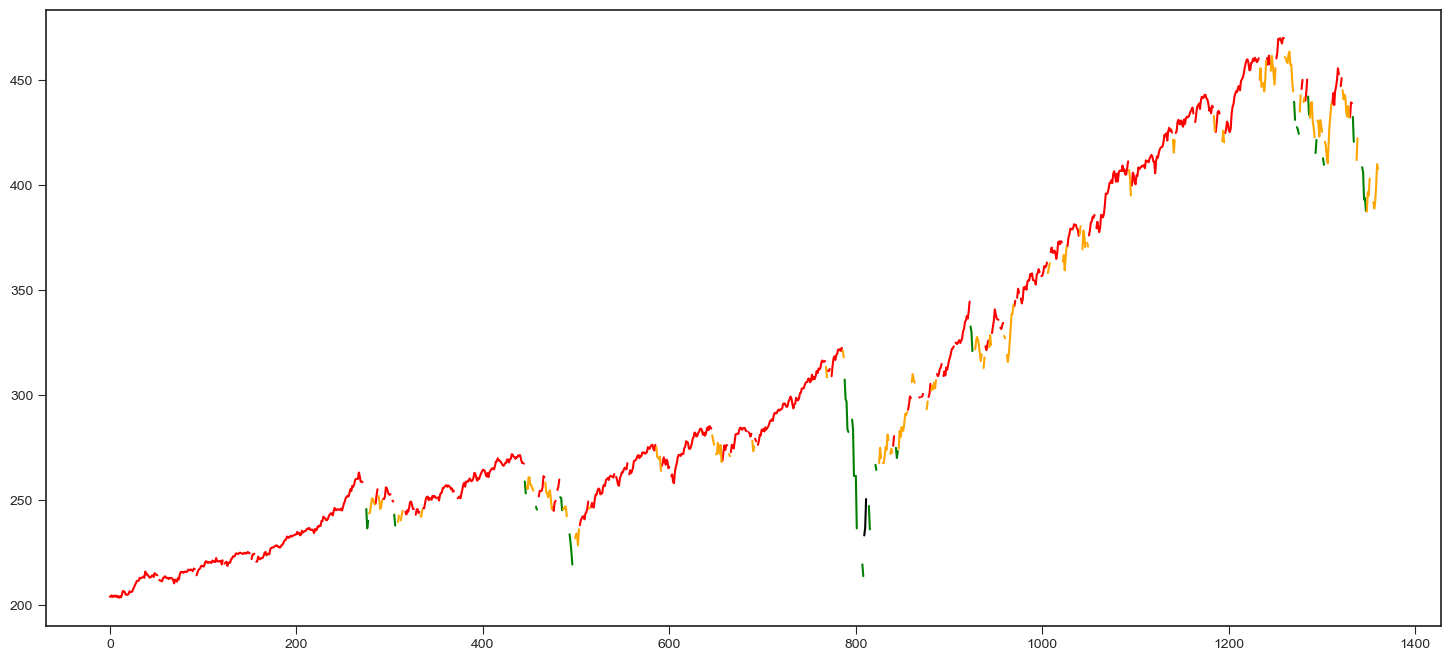

In [13]:
# Plot Chart
fig = plt.figure(figsize= (18, 8))
plt.plot(labels_0, color="green")
plt.plot(labels_1, color="red")
plt.plot(labels_2, color="orange")
plt.plot(labels_3, color="black")
plt.show()

### Conclusion

Although work is still yet to be done in the following notebook, we can cleary see from the chart above, that the Hidden Markov Model has been able to identify market regimes based on returns and volatility behaviour.

### Useful Resources

HMM Colab Version with Backtest: https://colab.research.google.com/drive/12qzR8SrhfhQDBImKYQqUKdj6n60E9jNp?usp=sharing